<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relative Strength Index**
\
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.



*  An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
*   Therefore we buy when RSI < 30 and sell when RSI > 70



In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the dta
from google.colab import files
uploaded=files.upload()

Saving WIPRO-2017.csv to WIPRO-2017.csv


In [4]:
#store the data into a df
df = pd.read_csv('WIPRO-2017.csv')
#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73
...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48


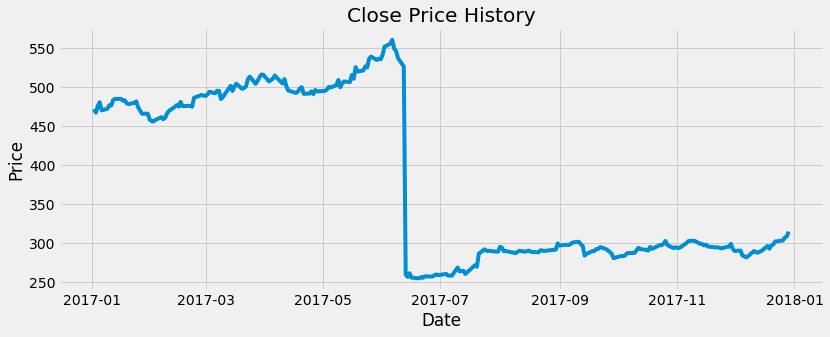

In [5]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
prices = []
c = 0
# Add the closing prices to the prices list and make sure we start at greater than 2 dollars to reduce outlier calculations.
while c < len(df):
    if df.iloc[c,4] > float(0.00):
        prices.append(df.iloc[c,4])
    c += 1
i = 0
upPrices=[]
downPrices=[]
#  Loop to hold up and down price movements
while i < len(prices):
    if i == 0:
        upPrices.append(0)
        downPrices.append(0)
    else:
        if (prices[i]-prices[i-1])>0:
            upPrices.append(prices[i]-prices[i-1])
            downPrices.append(0)
        else:
            downPrices.append(prices[i]-prices[i-1])
            upPrices.append(0)
    i += 1
x = 0
avg_gain = []
avg_loss = []

while x < len(upPrices):
    if x <15:
        avg_gain.append(0)
        avg_loss.append(0)
    else:
        sumGain = 0
        sumLoss = 0
        y = x-14
        while y<=x:
            sumGain += upPrices[y]
            sumLoss += downPrices[y]
            y += 1
        avg_gain.append(sumGain/14)
        avg_loss.append(abs(sumLoss/14))
    x += 1

# calculate rs and rsi
p = 0
# RS = []
RSI = []
while p < len(prices):
    if p <15:
        # RS.append(0)
        RSI.append(0)
    else:
        RSvalue = (avg_gain[p]/avg_loss[p])
        # RS.append(RSvalue)
        RSI.append(100 - (100/(1+RSvalue)))
    p+=1

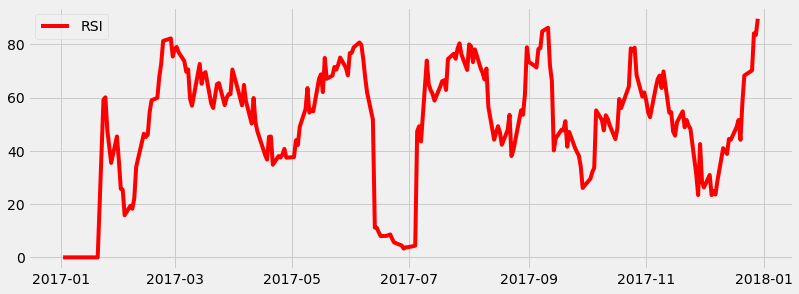

In [7]:
#plot rsi
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,RSI,label='RSI',color='red')
plt.legend(loc='upper left')
plt.show()

In [8]:
# add RSI to df
df['RSI'] = RSI

In [9]:
#Create a function to signal when to buy adn sell and asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['RSI'][i] < 30:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['RSI'][i] > 70:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
  return (Buy,Sell)

In [10]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),RSI
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63,0.000000
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45,0.000000
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42,0.000000
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90,0.000000
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73,0.000000
...,...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33,68.265162
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42,70.198675
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55,84.104046
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48,83.500717


In [11]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

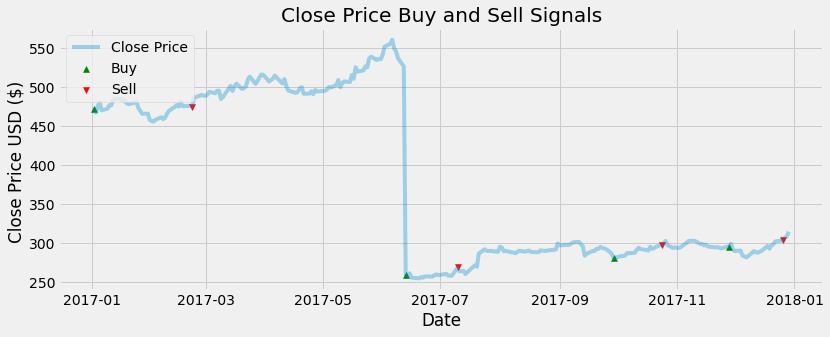

In [12]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($) ')
plt.legend(loc='upper left')
plt.show()